In [52]:
from netCDF4 import Dataset
from netCDF4 import num2date, date2num
import netCDF4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import autokeras as ak
from math import sqrt
from sklearn.utils import shuffle
import sklearn
import time

In [8]:
print('rre')

rre


In [9]:
datafile = open('PickleDataFiles/wrfout_d01_2019-05-01_2019-05_03', 'rb')      
data = pickle.load(datafile) 

In [10]:
for i in data.keys():
    if i != 'times':
        print(i+':'+str(data[i].shape))

latitude:(29, 29)
longitude:(29, 29)
temperature:(72, 29, 29, 29)
xWind:(72, 29, 29, 30)
yWind:(72, 29, 30, 29)
zWind:(72, 30, 29, 29)
pressure:(72, 29, 29, 29)
pblh:(72, 29, 29)


In [11]:
data['latitude'][15][13]

37.17219

In [12]:
data['longitude'][15][13]

-97.81299

In [30]:
lat_loc=15
lon_loc=13

In [16]:
df=pd.DataFrame()
for i in range(len(data['temperature'])):
    subTemp=data['temperature'][i][lat_loc][lon_loc]
    #subPre=data['pressure'][i][15][13]
    subXWind=data['xWind'][i][lat_loc][lon_loc]
    subYWind=data['yWind'][i][lat_loc][lon_loc]
    subZWind=data['zWind'][i][lat_loc][lon_loc]
    dataList=[]
    dataList.append(data['times'][i])
    dataList.append(data['latitude'][lat_loc][lon_loc])
    dataList.append(data['longitude'][lat_loc][lon_loc])
    for t,x,y,z in zip(subTemp,subXWind,subYWind,subZWind):
        #print(t,p)
        dataList.append(t)
        #dataList.append(p)
        dataList.append(x)
        dataList.append(y)
        dataList.append(z)
    #print(dataList)
    df=df.append(pd.Series(dataList),ignore_index=True)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,[2019-05-01_00:00:00],52.606831,-34.104797,115.971344,-0.391997,-2.002152,-0.288661,113.803925,-2.387180,-2.743226,...,3.239463,-0.212678,118.187073,-3.716157,4.716005,-0.098456,116.023956,-2.235791,5.644352,-0.097798
1,[2019-05-01_01:00:00],52.606831,-34.104797,115.884521,-0.153308,-2.090641,-0.243471,113.906647,-2.070197,-2.550007,...,3.194532,-0.152048,118.317566,-3.745245,4.705674,-0.024508,116.247833,-2.289180,5.702183,-0.024157
2,[2019-05-01_02:00:00],52.606831,-34.104797,115.797455,0.085381,-2.179131,-0.146002,114.012787,-1.753214,-2.275752,...,3.120421,-0.113024,118.447906,-3.774332,4.663068,0.019167,116.471893,-2.342567,5.760014,0.019336
3,[2019-05-01_03:00:00],52.606831,-34.104797,115.710388,0.324069,-2.267619,-0.033476,114.118958,-1.436231,-1.976035,...,3.026664,-0.083085,118.578217,-3.803420,4.601554,0.052912,116.696014,-2.395955,5.817843,0.052942
4,[2019-05-01_04:00:00],52.606831,-34.104797,115.623322,0.562758,-2.356108,0.085690,114.225128,-1.119248,-1.663824,...,2.930191,-0.055052,118.708618,-3.832508,4.535440,0.083689,116.920135,-2.449343,5.875674,0.083592


,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,115,116
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,14.909715,11.195925,0.302637,-0.014850,14.756062,10.525841,-0.083207,-0.014826,14.423634,9.300237,...,-0.044669,-0.008099,14.992210,0.594791,-1.198666,0.006302,15.631646,1.937748,-1.165821,0.006552
std,0.976493,3.339355,1.054941,0.020459,1.095013,2.975917,1.473725,0.020383,1.388567,2.037471,...,2.188135,0.010747,0.390014,2.021797,1.436848,0.025278,0.524471,2.630192,1.454775,0.025419
min,13.718475,6.510080,-1.436874,-0.053822,12.938263,5.494700,-3.421114,-0.053754,10.823700,5.305680,...,-2.571233,-0.026657,14.413818,-2.010662,-3.307192,-0.062682,14.792847,-1.866012,-3.194953,-0.062674
25%,14.186722,8.440501,-0.501381,-0.028423,14.004433,8.580231,-1.272683,-0.028367,14.160568,8.184625,...,-1.820135,-0.016901,14.646576,-1.215991,-2.433741,-0.001223,15.234917,-1.105378,-2.466389,-0.001070
50%,14.557327,10.400927,0.078842,-0.015760,14.642700,9.857883,-0.134682,-0.015687,14.811447,8.772131,...,-0.520580,-0.007195,14.927444,-0.167477,-1.332839,0.012657,15.534790,1.702123,-1.485901,0.012907
75%,15.483055,14.432962,0.808836,-0.000554,15.519867,13.220193,1.055718,-0.000564,15.296280,11.380456,...,1.419758,-0.002106,15.230545,2.456013,0.281340,0.021918,16.131981,4.518661,0.216057,0.022257
max,16.823853,17.710331,2.745188,0.028356,16.620361,16.901733,3.159425,0.028074,16.087433,13.080972,...,4.666490,0.022843,15.999451,4.385574,1.349130,0.037686,16.569916,5.347761,1.631986,0.038189


In [29]:
data['times'][2]

'[2019-05-01_02:00:00]'

In [42]:
data['latitude'].shape

(29, 29)

In [18]:
df=pd.DataFrame()
for lat_loc in range(29):
    for lon_loc in range(29):
        for i in range(len(data['temperature'])):
            subTemp=data['temperature'][i][lat_loc][lon_loc]
            #subPre=data['pressure'][i][15][13]
            subXWind=data['xWind'][i][lat_loc][lon_loc]
            subYWind=data['yWind'][i][lat_loc][lon_loc]
            subZWind=data['zWind'][i][lat_loc][lon_loc]
            dataList=[]
            dataList.append(data['times'][i])
            dataList.append(data['latitude'][lat_loc][lon_loc])
            dataList.append(data['longitude'][lat_loc][lon_loc])
            for t,x,y,z in zip(subTemp,subXWind,subYWind,subZWind):
                #print(t,p)
                dataList.append(t)
                #dataList.append(p)
                dataList.append(x)
                dataList.append(y)
                dataList.append(z)
            #print(dataList)
            df=df.append(pd.Series(dataList),ignore_index=True)

In [19]:
df.shape


(60552, 119)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,[2019-05-01_00:00:00],1.914337,-121.557693,1.063843,-2.787792,2.597793,0.0,0.951996,-2.270515,3.422637,...,-0.746774,-0.000687,-0.919312,-3.509760,-1.129234,0.003088,-0.785828,-0.390538,-1.352398,0.000031
1,[2019-05-01_01:00:00],1.914337,-121.557693,0.934601,-2.769493,2.664633,0.0,0.892029,-2.353379,3.416711,...,-0.979085,-0.001057,-1.255554,-3.353839,-1.064637,0.003003,-1.158691,-0.371835,-1.388470,0.000027
2,[2019-05-01_02:00:00],1.914337,-121.557693,0.803558,-2.751212,2.731407,0.0,0.831177,-2.436157,3.410791,...,-1.211211,-0.001425,-1.584015,-3.198024,-1.000076,0.002920,-1.525757,-0.353144,-1.424517,0.000024
3,[2019-05-01_03:00:00],1.914337,-121.557693,0.672638,-2.732949,2.798114,0.0,0.770386,-2.518848,3.404877,...,-1.443153,-0.001790,-1.912384,-3.042314,-0.935551,0.002837,-1.892700,-0.334465,-1.460538,0.000021
4,[2019-05-01_04:00:00],1.914337,-121.557693,0.541901,-2.714705,2.864756,0.0,0.709686,-2.601454,3.398969,...,-1.674910,-0.002147,-2.240692,-2.886710,-0.871063,0.002754,-2.259460,-0.315797,-1.496535,0.000018


In [22]:
df.rename(columns = {0:'Time', 1:'Latitude', 2:'Longitude'}, inplace = True)

In [23]:
df.head()

,Time,Latitude,Longitude,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,[2019-05-01_00:00:00],1.914337,-121.557693,1.063843,-2.787792,2.597793,0.0,0.951996,-2.270515,3.422637,...,-0.746774,-0.000687,-0.919312,-3.509760,-1.129234,0.003088,-0.785828,-0.390538,-1.352398,0.000031
1,[2019-05-01_01:00:00],1.914337,-121.557693,0.934601,-2.769493,2.664633,0.0,0.892029,-2.353379,3.416711,...,-0.979085,-0.001057,-1.255554,-3.353839,-1.064637,0.003003,-1.158691,-0.371835,-1.388470,0.000027
2,[2019-05-01_02:00:00],1.914337,-121.557693,0.803558,-2.751212,2.731407,0.0,0.831177,-2.436157,3.410791,...,-1.211211,-0.001425,-1.584015,-3.198024,-1.000076,0.002920,-1.525757,-0.353144,-1.424517,0.000024
3,[2019-05-01_03:00:00],1.914337,-121.557693,0.672638,-2.732949,2.798114,0.0,0.770386,-2.518848,3.404877,...,-1.443153,-0.001790,-1.912384,-3.042314,-0.935551,0.002837,-1.892700,-0.334465,-1.460538,0.000021
4,[2019-05-01_04:00:00],1.914337,-121.557693,0.541901,-2.714705,2.864756,0.0,0.709686,-2.601454,3.398969,...,-1.674910,-0.002147,-2.240692,-2.886710,-0.871063,0.002754,-2.259460,-0.315797,-1.496535,0.000018


pblhList=[]
for i in range(len(data['pblh'])):
    pblhList.append(data['pblh'][i][lat_loc][lon_loc])
    
df['pblh']=pblhList

In [24]:
pblhList=[]
for lat_loc in range(29):
    for lon_loc in range(29):
        for i in range(len(data['pblh'])):
            pblhList.append(data['pblh'][i][lat_loc][lon_loc])
    
df['pblh']=pblhList

In [25]:
df.head()

,Time,Latitude,Longitude,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,pblh
0,[2019-05-01_00:00:00],1.914337,-121.557693,1.063843,-2.787792,2.597793,0.0,0.951996,-2.270515,3.422637,...,-0.000687,-0.919312,-3.509760,-1.129234,0.003088,-0.785828,-0.390538,-1.352398,0.000031,704.896545
1,[2019-05-01_01:00:00],1.914337,-121.557693,0.934601,-2.769493,2.664633,0.0,0.892029,-2.353379,3.416711,...,-0.001057,-1.255554,-3.353839,-1.064637,0.003003,-1.158691,-0.371835,-1.388470,0.000027,628.219482
2,[2019-05-01_02:00:00],1.914337,-121.557693,0.803558,-2.751212,2.731407,0.0,0.831177,-2.436157,3.410791,...,-0.001425,-1.584015,-3.198024,-1.000076,0.002920,-1.525757,-0.353144,-1.424517,0.000024,570.850952
3,[2019-05-01_03:00:00],1.914337,-121.557693,0.672638,-2.732949,2.798114,0.0,0.770386,-2.518848,3.404877,...,-0.001790,-1.912384,-3.042314,-0.935551,0.002837,-1.892700,-0.334465,-1.460538,0.000021,509.544250
4,[2019-05-01_04:00:00],1.914337,-121.557693,0.541901,-2.714705,2.864756,0.0,0.709686,-2.601454,3.398969,...,-0.002147,-2.240692,-2.886710,-0.871063,0.002754,-2.259460,-0.315797,-1.496535,0.000018,444.218903


In [26]:
df.to_csv('csv/df_20190501_20190503_US_WITH_TIME_LAT_LON.csv',index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'csv/df_20190501_20190503_US_WITH_TIME_LAT_LON.csv'

In [27]:
df =pd.read_csv('/home/rgite1/Notebooks/csv/df_20190501_20190503_US_WITH_TIME_LAT_LON.csv')

In [28]:
df.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Time,Latitude,Longitude,3,4,5,6,7,...,110,111,112,113,114,115,116,117,118,pblh
0,0,0,[2019-05-01_00:00:00],1.914337,-121.557693,1.063843,-2.787792,2.597793,0.0,0.951996,...,-0.000687,-0.919312,-3.509760,-1.129234,0.003088,-0.785828,-0.390538,-1.352398,0.000031,704.896545
1,1,1,[2019-05-01_01:00:00],1.914337,-121.557693,0.934601,-2.769493,2.664633,0.0,0.892029,...,-0.001057,-1.255554,-3.353839,-1.064637,0.003003,-1.158691,-0.371835,-1.388470,0.000027,628.219482
2,2,2,[2019-05-01_02:00:00],1.914337,-121.557693,0.803558,-2.751212,2.731407,0.0,0.831177,...,-0.001425,-1.584015,-3.198024,-1.000076,0.002920,-1.525757,-0.353144,-1.424517,0.000024,570.850952
3,3,3,[2019-05-01_03:00:00],1.914337,-121.557693,0.672638,-2.732949,2.798114,0.0,0.770386,...,-0.001790,-1.912384,-3.042314,-0.935551,0.002837,-1.892700,-0.334465,-1.460538,0.000021,509.544250
4,4,4,[2019-05-01_04:00:00],1.914337,-121.557693,0.541901,-2.714705,2.864756,0.0,0.709686,...,-0.002147,-2.240692,-2.886710,-0.871063,0.002754,-2.259460,-0.315797,-1.496535,0.000018,444.218903


In [29]:
df.rename(columns = {'Unnamed: 0.1':'Index'}, inplace = True)

In [30]:
df.drop('Unnamed: 0.1.1',axis=1 , inplace=True)

In [31]:
df.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,pblh
0,0,[2019-05-01_00:00:00],1.914337,-121.557693,1.063843,-2.787792,2.597793,0.0,0.951996,-2.270515,...,-0.000687,-0.919312,-3.509760,-1.129234,0.003088,-0.785828,-0.390538,-1.352398,0.000031,704.896545
1,1,[2019-05-01_01:00:00],1.914337,-121.557693,0.934601,-2.769493,2.664633,0.0,0.892029,-2.353379,...,-0.001057,-1.255554,-3.353839,-1.064637,0.003003,-1.158691,-0.371835,-1.388470,0.000027,628.219482
2,2,[2019-05-01_02:00:00],1.914337,-121.557693,0.803558,-2.751212,2.731407,0.0,0.831177,-2.436157,...,-0.001425,-1.584015,-3.198024,-1.000076,0.002920,-1.525757,-0.353144,-1.424517,0.000024,570.850952
3,3,[2019-05-01_03:00:00],1.914337,-121.557693,0.672638,-2.732949,2.798114,0.0,0.770386,-2.518848,...,-0.001790,-1.912384,-3.042314,-0.935551,0.002837,-1.892700,-0.334465,-1.460538,0.000021,509.544250
4,4,[2019-05-01_04:00:00],1.914337,-121.557693,0.541901,-2.714705,2.864756,0.0,0.709686,-2.601454,...,-0.002147,-2.240692,-2.886710,-0.871063,0.002754,-2.259460,-0.315797,-1.496535,0.000018,444.218903


In [32]:
df_copy=df.copy()

In [33]:
df.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,pblh
0,0,[2019-05-01_00:00:00],1.914337,-121.557693,1.063843,-2.787792,2.597793,0.0,0.951996,-2.270515,...,-0.000687,-0.919312,-3.509760,-1.129234,0.003088,-0.785828,-0.390538,-1.352398,0.000031,704.896545
1,1,[2019-05-01_01:00:00],1.914337,-121.557693,0.934601,-2.769493,2.664633,0.0,0.892029,-2.353379,...,-0.001057,-1.255554,-3.353839,-1.064637,0.003003,-1.158691,-0.371835,-1.388470,0.000027,628.219482
2,2,[2019-05-01_02:00:00],1.914337,-121.557693,0.803558,-2.751212,2.731407,0.0,0.831177,-2.436157,...,-0.001425,-1.584015,-3.198024,-1.000076,0.002920,-1.525757,-0.353144,-1.424517,0.000024,570.850952
3,3,[2019-05-01_03:00:00],1.914337,-121.557693,0.672638,-2.732949,2.798114,0.0,0.770386,-2.518848,...,-0.001790,-1.912384,-3.042314,-0.935551,0.002837,-1.892700,-0.334465,-1.460538,0.000021,509.544250
4,4,[2019-05-01_04:00:00],1.914337,-121.557693,0.541901,-2.714705,2.864756,0.0,0.709686,-2.601454,...,-0.002147,-2.240692,-2.886710,-0.871063,0.002754,-2.259460,-0.315797,-1.496535,0.000018,444.218903


In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.iloc[:, 4:])
df_Scaled = pd.DataFrame(scaled, columns = df.iloc[:, 4:].columns)

In [35]:
df_Scaled.head()

,3,4,5,6,7,8,9,10,11,12,...,110,111,112,113,114,115,116,117,118,pblh
0,0.172112,0.246382,0.584801,0.46001,0.174023,0.253831,0.561746,0.459395,0.170224,0.251297,...,0.671739,0.171991,0.319512,0.235890,0.476309,0.159324,0.408051,0.180135,0.473292,0.177355
1,0.171215,0.246594,0.586164,0.46001,0.173603,0.252918,0.561627,0.459395,0.169685,0.249649,...,0.671556,0.169772,0.321006,0.236734,0.476260,0.156812,0.408217,0.179692,0.473290,0.157460
2,0.170304,0.246805,0.587526,0.46001,0.173177,0.252006,0.561509,0.459395,0.169139,0.248002,...,0.671374,0.167604,0.322499,0.237578,0.476213,0.154340,0.408383,0.179250,0.473288,0.142576
3,0.169395,0.247016,0.588887,0.46001,0.172752,0.251095,0.561392,0.459395,0.168593,0.246358,...,0.671194,0.165437,0.323991,0.238422,0.476166,0.151868,0.408548,0.178809,0.473287,0.126669
4,0.168487,0.247227,0.590246,0.46001,0.172327,0.250185,0.561274,0.459395,0.168047,0.244715,...,0.671017,0.163271,0.325482,0.239265,0.476118,0.149397,0.408714,0.178367,0.473285,0.109720


In [36]:
df_Scaled.insert(loc=0, column='Index', value=df['Index'])
df_Scaled.insert(loc=1, column='Time', value=df['Time'])
df_Scaled.insert(loc=2, column='Latitude', value=df['Latitude'])
df_Scaled.insert(loc=3, column='Longitude', value=df['Longitude'])

In [37]:
df_Scaled.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,pblh
0,0,[2019-05-01_00:00:00],1.914337,-121.557693,0.172112,0.246382,0.584801,0.46001,0.174023,0.253831,...,0.671739,0.171991,0.319512,0.235890,0.476309,0.159324,0.408051,0.180135,0.473292,0.177355
1,1,[2019-05-01_01:00:00],1.914337,-121.557693,0.171215,0.246594,0.586164,0.46001,0.173603,0.252918,...,0.671556,0.169772,0.321006,0.236734,0.476260,0.156812,0.408217,0.179692,0.473290,0.157460
2,2,[2019-05-01_02:00:00],1.914337,-121.557693,0.170304,0.246805,0.587526,0.46001,0.173177,0.252006,...,0.671374,0.167604,0.322499,0.237578,0.476213,0.154340,0.408383,0.179250,0.473288,0.142576
3,3,[2019-05-01_03:00:00],1.914337,-121.557693,0.169395,0.247016,0.588887,0.46001,0.172752,0.251095,...,0.671194,0.165437,0.323991,0.238422,0.476166,0.151868,0.408548,0.178809,0.473287,0.126669
4,4,[2019-05-01_04:00:00],1.914337,-121.557693,0.168487,0.247227,0.590246,0.46001,0.172327,0.250185,...,0.671017,0.163271,0.325482,0.239265,0.476118,0.149397,0.408714,0.178367,0.473285,0.109720


In [38]:
df_shuffle = shuffle(df_Scaled)

In [39]:
df_shuffle.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,pblh
51562,51562,[2019-05-01_10:00:00],55.050468,-69.063354,0.409308,0.268497,0.796958,0.282880,0.372912,0.338032,...,0.741462,0.438721,0.755541,0.345701,0.521560,0.402946,0.664216,0.387064,0.519997,0.053514
2116,2116,[2019-05-02_04:00:00],3.647041,-122.089630,0.166423,0.251237,0.577991,0.460854,0.171927,0.259019,...,0.672090,0.165615,0.322633,0.251090,0.476545,0.164975,0.410750,0.212795,0.473351,0.141550
44898,44898,[2019-05-02_18:00:00],51.045017,-94.072845,0.360346,0.681726,0.370499,0.450400,0.347578,0.662902,...,0.667136,0.368745,0.366795,0.266014,0.462084,0.367003,0.446367,0.202677,0.460784,0.285133
15657,15657,[2019-05-02_09:00:00],19.356781,-95.612122,0.087154,0.286449,0.587742,0.462042,0.089539,0.281243,...,0.667949,0.143514,0.302269,0.196734,0.469880,0.128047,0.369932,0.135071,0.468603,0.183552
16000,16000,[2019-05-01_16:00:00],18.311882,-84.522675,0.068272,0.185560,0.708939,0.456909,0.076740,0.211610,...,0.665965,0.099571,0.455166,0.244006,0.474958,0.109041,0.520953,0.233386,0.473650,0.178619


In [40]:
x=df_shuffle.iloc[:,:-1]

In [41]:
x.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,109,110,111,112,113,114,115,116,117,118
51562,51562,[2019-05-01_10:00:00],55.050468,-69.063354,0.409308,0.268497,0.796958,0.282880,0.372912,0.338032,...,0.352255,0.741462,0.438721,0.755541,0.345701,0.521560,0.402946,0.664216,0.387064,0.519997
2116,2116,[2019-05-02_04:00:00],3.647041,-122.089630,0.166423,0.251237,0.577991,0.460854,0.171927,0.259019,...,0.368790,0.672090,0.165615,0.322633,0.251090,0.476545,0.164975,0.410750,0.212795,0.473351
44898,44898,[2019-05-02_18:00:00],51.045017,-94.072845,0.360346,0.681726,0.370499,0.450400,0.347578,0.662902,...,0.376016,0.667136,0.368745,0.366795,0.266014,0.462084,0.367003,0.446367,0.202677,0.460784
15657,15657,[2019-05-02_09:00:00],19.356781,-95.612122,0.087154,0.286449,0.587742,0.462042,0.089539,0.281243,...,0.325332,0.667949,0.143514,0.302269,0.196734,0.469880,0.128047,0.369932,0.135071,0.468603
16000,16000,[2019-05-01_16:00:00],18.311882,-84.522675,0.068272,0.185560,0.708939,0.456909,0.076740,0.211610,...,0.331954,0.665965,0.099571,0.455166,0.244006,0.474958,0.109041,0.520953,0.233386,0.473650


In [42]:
x.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,109,110,111,112,113,114,115,116,117,118
51562,51562,[2019-05-01_10:00:00],55.050468,-69.063354,0.409308,0.268497,0.796958,0.282880,0.372912,0.338032,...,0.352255,0.741462,0.438721,0.755541,0.345701,0.521560,0.402946,0.664216,0.387064,0.519997
2116,2116,[2019-05-02_04:00:00],3.647041,-122.089630,0.166423,0.251237,0.577991,0.460854,0.171927,0.259019,...,0.368790,0.672090,0.165615,0.322633,0.251090,0.476545,0.164975,0.410750,0.212795,0.473351
44898,44898,[2019-05-02_18:00:00],51.045017,-94.072845,0.360346,0.681726,0.370499,0.450400,0.347578,0.662902,...,0.376016,0.667136,0.368745,0.366795,0.266014,0.462084,0.367003,0.446367,0.202677,0.460784
15657,15657,[2019-05-02_09:00:00],19.356781,-95.612122,0.087154,0.286449,0.587742,0.462042,0.089539,0.281243,...,0.325332,0.667949,0.143514,0.302269,0.196734,0.469880,0.128047,0.369932,0.135071,0.468603
16000,16000,[2019-05-01_16:00:00],18.311882,-84.522675,0.068272,0.185560,0.708939,0.456909,0.076740,0.211610,...,0.331954,0.665965,0.099571,0.455166,0.244006,0.474958,0.109041,0.520953,0.233386,0.473650


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_shuffle.iloc[:, :-1], df_shuffle['pblh'], test_size=0.3, shuffle=False)

In [44]:
X_train.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,109,110,111,112,113,114,115,116,117,118
51562,51562,[2019-05-01_10:00:00],55.050468,-69.063354,0.409308,0.268497,0.796958,0.282880,0.372912,0.338032,...,0.352255,0.741462,0.438721,0.755541,0.345701,0.521560,0.402946,0.664216,0.387064,0.519997
2116,2116,[2019-05-02_04:00:00],3.647041,-122.089630,0.166423,0.251237,0.577991,0.460854,0.171927,0.259019,...,0.368790,0.672090,0.165615,0.322633,0.251090,0.476545,0.164975,0.410750,0.212795,0.473351
44898,44898,[2019-05-02_18:00:00],51.045017,-94.072845,0.360346,0.681726,0.370499,0.450400,0.347578,0.662902,...,0.376016,0.667136,0.368745,0.366795,0.266014,0.462084,0.367003,0.446367,0.202677,0.460784
15657,15657,[2019-05-02_09:00:00],19.356781,-95.612122,0.087154,0.286449,0.587742,0.462042,0.089539,0.281243,...,0.325332,0.667949,0.143514,0.302269,0.196734,0.469880,0.128047,0.369932,0.135071,0.468603
16000,16000,[2019-05-01_16:00:00],18.311882,-84.522675,0.068272,0.185560,0.708939,0.456909,0.076740,0.211610,...,0.331954,0.665965,0.099571,0.455166,0.244006,0.474958,0.109041,0.520953,0.233386,0.473650


In [45]:
X_train.iloc[:,4:]

,3,4,5,6,7,8,9,10,11,12,...,109,110,111,112,113,114,115,116,117,118
51562,0.409308,0.268497,0.796958,0.282880,0.372912,0.338032,0.576994,0.283528,0.365998,0.388207,...,0.352255,0.741462,0.438721,0.755541,0.345701,0.521560,0.402946,0.664216,0.387064,0.519997
2116,0.166423,0.251237,0.577991,0.460854,0.171927,0.259019,0.543213,0.460232,0.165406,0.262994,...,0.368790,0.672090,0.165615,0.322633,0.251090,0.476545,0.164975,0.410750,0.212795,0.473351
44898,0.360346,0.681726,0.370499,0.450400,0.347578,0.662902,0.372841,0.449919,0.341387,0.564615,...,0.376016,0.667136,0.368745,0.366795,0.266014,0.462084,0.367003,0.446367,0.202677,0.460784
15657,0.087154,0.286449,0.587742,0.462042,0.089539,0.281243,0.511765,0.461441,0.083210,0.275541,...,0.325332,0.667949,0.143514,0.302269,0.196734,0.469880,0.128047,0.369932,0.135071,0.468603
16000,0.068272,0.185560,0.708939,0.456909,0.076740,0.211610,0.613923,0.456280,0.067100,0.219193,...,0.331954,0.665965,0.099571,0.455166,0.244006,0.474958,0.109041,0.520953,0.233386,0.473650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,0.209227,0.226988,0.557232,0.466875,0.213662,0.241623,0.516455,0.466188,0.206108,0.245473,...,0.268173,0.683525,0.221061,0.328613,0.161457,0.469592,0.206262,0.400154,0.125650,0.466866
45785,0.315953,0.731023,0.535956,0.519844,0.314932,0.715127,0.380091,0.518860,0.311004,0.690100,...,0.235122,0.806212,0.338944,0.288769,0.263792,0.192941,0.318742,0.345051,0.349331,0.193295
10717,0.174086,0.161623,0.582962,0.459343,0.174168,0.152388,0.494724,0.458742,0.164478,0.143900,...,0.373928,0.668528,0.189780,0.336121,0.125298,0.476277,0.174846,0.369753,0.202726,0.474308
58835,0.626035,0.476018,0.566551,0.445694,0.633354,0.493515,0.541813,0.445190,0.640135,0.502095,...,0.503486,0.671514,0.644947,0.498280,0.399151,0.449102,0.634497,0.524675,0.334201,0.448469


In [51]:
def my_objective(y_pred,  y_true):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred-y_true)))


In [53]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=50, overwrite=True, loss=my_objective)
# Feed the structured data regressor with training data.
reg.fit(X_train.iloc[:,4:], y_train, epochs=100)
# Predict with the best model.
predicted_y = reg.predict(X_test.iloc[:,4:])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/rgite1/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-b2cb7ec3f750>", line 4, in <module>
    reg.fit(X_train.iloc[:,4:], y_train, epochs=100)
  File "/home/rgite1/anaconda3/lib/python3.7/site-packages/autokeras/tasks/structured_data.py", line 95, in fit
    **kwargs)
  File "/home/rgite1/anaconda3/lib/python3.7/site-packages/autokeras/auto_model.py", line 239, in fit
    validation_split=validation_split)
  File "/home/rgite1/anaconda3/lib/python3.7/site-packages/autokeras/auto_model.py", line 313, in _prepare_data
    dataset = self._process_xy(x, y, True)
  File "/home/rgite1/anaconda3/lib/python3.7/site-packages/autokeras/auto_model.py", line 300, in _process_xy
    x = self._process_x(x, fit)
  File "/home/rgite1/anaconda3/lib/python3.7/site-packages/autokeras/auto_model.py", line 265, in _process_x
    da

KeyboardInterrupt: 

In [54]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=2, overwrite=True, loss=my_objective)
# Feed the structured data regressor with training data.
reg.fit(X_train.iloc[:,4:], y_train, epochs=1)
# Predict with the best model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Train for 1060 steps, validate for 265 steps
1060/1060 [==============================] - ETA: 1:37:17 - loss: 0.9298 - mean_squared_error: 0.864 - ETA: 49:16 - loss: 0.8634 - mean_squared_error: 0.7498  - ETA: 14:32 - loss: 0.6008 - mean_squared_error: 0.402 - ETA: 12:50 - loss: 0.5589 - mean_squared_error: 0.360 - ETA: 9:25 - loss: 0.4499 - mean_squared_error: 0.269 - ETA: 7:28 - loss: 0.3845 - mean_squared_error: 0.21 - ETA: 7:01 - loss: 0.3717 - mean_squared_error: 0.20 - ETA: 5:02 - loss: 0.3080 - mean_squared_error: 0.15 - ETA: 3:47 - loss: 0.2615 - mean_squared_error: 0.11 - ETA: 3:08 - loss: 0.2356 - mean_squared_error: 0.09 - ETA: 2:12 - loss: 0.2010 - mean_squared_error: 0.07 - ETA: 1:43 - loss: 0.1803 - mean_squared_error: 0.06 - ETA: 1:27 - loss: 0.1693 - mean_square

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Train for 1060 steps, validate for 265 steps
1060/1060 [==============================] - ETA: 23:07 - loss: 1.0506 - mean_squared_error: 1.103 - ETA: 2:59 - loss: 0.9211 - mean_squared_error: 0.907 - ETA: 2:18 - loss: 0.8721 - mean_squared_error: 0.81 - ETA: 1:31 - loss: 0.8165 - mean_squared_error: 0.70 - ETA: 1:04 - loss: 0.7869 - mean_squared_error: 0.65 - ETA: 1:02 - loss: 0.7693 - mean_squared_error: 0.62 - ETA: 50s - loss: 0.7296 - mean_squared_error: 0.5698 - ETA: 41s - loss: 0.6996 - mean_squared_error: 0.524 - ETA: 36s - loss: 0.6849 - mean_squared_error: 0.501 - ETA: 32s - loss: 0.6721 - mean_squared_error: 0.483 - ETA: 29s - loss: 0.6540 - mean_squared_error: 0.460 - ETA: 26s - loss: 0.6402 - mean_squared_error: 0.441 - ETA: 25s - loss: 0.6363 - mean_squared_error: 0

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Train for 1325 steps, validate for 265 steps
1179/1325 [=========================>....] - ETA: 17:23 - loss: 1.0810 - mean_squared_error: 1.168 - ETA: 2:18 - loss: 0.9369 - mean_squared_error: 0.890 - ETA: 1:17 - loss: 0.8092 - mean_squared_error: 0.68 - ETA: 55s - loss: 0.7630 - mean_squared_error: 0.6144 - ETA: 44s - loss: 0.7246 - mean_squared_error: 0.555 - ETA: 36s - loss: 0.6818 - mean_squared_error: 0.495 - ETA: 31s - loss: 0.6530 - mean_squared_error: 0.456 - ETA: 27s - loss: 0.6281 - mean_squared_error: 0.424 - ETA: 25s - loss: 0.6078 - mean_squared_error: 0.398 - ETA: 23s - loss: 0.5896 - mean_squared_error: 0.376 - ETA: 21s - loss: 0.5765 - mean_squared_error: 0.360 - ETA: 20s - loss: 0.5645 - mean_squared_error: 0.345 - ETA: 19s - loss: 0.5480 - mean_squared_error: 0

In [55]:
import time

# starting time
start = time.time()
predicted_y = reg.predict(X_test.iloc[:,4:])
end = time.time()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


In [56]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 7.39789080619812


In [227]:
def denormalized(origin_data, output_data):
    max_value=origin_data.max()
    min_value=origin_data.min()
    return output_data*(max_value-min_value)+min_value

In [228]:
model = reg.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 116)]             0         
_________________________________________________________________
categorical_encoding (Catego (None, 116)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               59904     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664 

In [318]:
r2=sklearn.metrics.r2_score(expected_de, predicted_de)

In [319]:
r2

0.6659970836533693

In [230]:
pr_o = np.array(predicted_y.flatten())

print(pr_o.shape)

pr_o = pr_o.reshape(1,len(predicted_y))

print("reshaped -", pr_o.shape)

predicted_de = denormalized(df['pblh'], pr_o)

predicted_de = predicted_de.flatten()
print("PREDICTED---------",predicted_de)

(18166,)
reshaped - (1, 18166)
PREDICTED--------- [ 257.58813  739.0097   800.8544  ...  593.5026  1216.0536   635.01086]


In [231]:
ep_o = np.array(y_test)
ep_o = ep_o.reshape(1,len(y_test))

expected_de = denormalized(df['pblh'], ep_o)

expected_de = expected_de.flatten()
print("EXPECTED---------",expected_de.shape)


EXPECTED--------- (18166,)


257.69977863910225


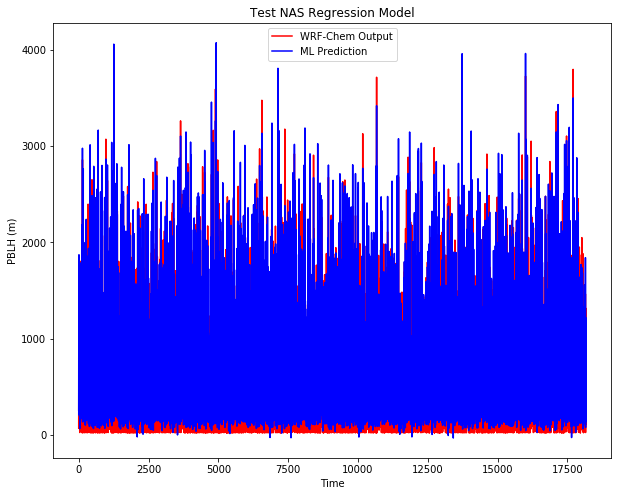

<Figure size 432x288 with 0 Axes>

In [232]:
rmse=sqrt(mean_squared_error(expected_de,predicted_de))

print(rmse)

# filename='tmp.png'
# colr = 'r'

plt.figure(figsize=(10,8))
plt.title('Test NAS Regression Model')
plt.xlabel('Time')
plt.ylabel('PBLH (m)')
plt.plot(expected_de, 'r', label='WRF-Chem Output')
plt.plot(predicted_de, 'b', label='ML Prediction ')
plt.legend()
plt.show()


In [233]:
with open('csv/rmse_WRFOUT_US_NAS_50Trial_100Epochs_20190501_0503.txt', 'w') as f:
    f.write('%d' % rmse)
    f.write('%d' % r2)

In [236]:
import h5py
#reg.save('Model/reg_50trial_100epochs_20190501_20190503.h5')
model.save('Model/model_50trial_100epochs_20190501_20190503.h5')

In [303]:
df_test=X_test.copy()

In [304]:
df_test['expected_de']=expected_de

In [305]:
df_test['predicted_de']=predicted_de

In [306]:
df_test.sort_values(by=['Index'], inplace=True)

In [307]:
timeList = [str(date)[1:-1] for date in df_test['Time']]
df_test['Time']=timeList
df_test['Time']= pd.to_datetime(df_test['Time'],format='%Y-%m-%d_%H:%M:%S')

In [308]:
df_test.to_csv('csv/df_test_expected_predicted_20190501_0503.csv')

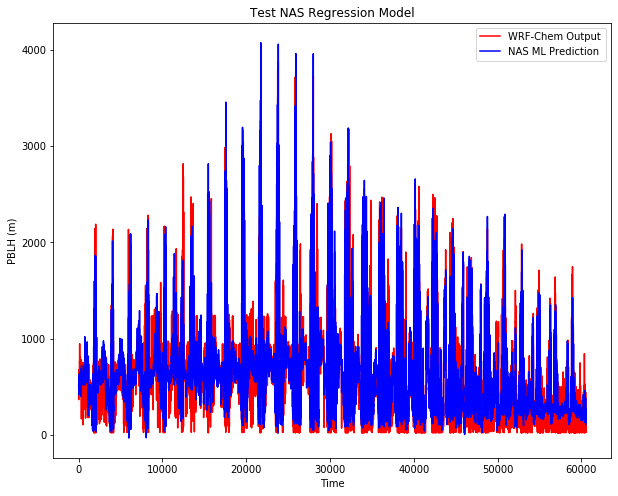

<Figure size 432x288 with 0 Axes>

In [257]:
plt.figure(figsize=(10,8))
plt.title('Test NAS Regression Model')
plt.xlabel('Time')
plt.ylabel('PBLH (m)')
plt.plot(df_test['expected_de'], 'r', label='WRF-Chem Output')
plt.plot(df_test['predicted_de'], 'b', label='NAS ML Prediction ')
plt.legend()
plt.show()
plt.savefig('img/WRFOUT_US_NAS_50Trial_100Epochs_sorted_20190501_0503.png')

In [320]:
df_test.shape

(18166, 122)

In [256]:
df_test.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,expected_de,predicted_de
5,5,[2019-05-01_05:00:00],1.914337,-121.557693,0.167579,0.247437,0.591604,0.46001,0.171902,0.249276,...,0.161104,0.326972,0.240107,0.476072,0.146927,0.408879,0.177926,0.473283,405.787964,518.688904
6,6,[2019-05-01_06:00:00],1.914337,-121.557693,0.166674,0.247648,0.592961,0.46001,0.171478,0.248367,...,0.158938,0.328461,0.240950,0.476026,0.144459,0.409044,0.177485,0.473281,367.491333,524.575256
8,8,[2019-05-01_08:00:00],1.914337,-121.557693,0.166425,0.246157,0.600238,0.46001,0.171452,0.250502,...,0.161600,0.336947,0.243384,0.475498,0.148740,0.410292,0.184378,0.473284,426.518402,517.653992
19,19,[2019-05-01_19:00:00],1.914337,-121.557693,0.166364,0.252462,0.617619,0.46001,0.171551,0.256853,...,0.212095,0.330654,0.227086,0.475645,0.201606,0.406882,0.181310,0.473347,613.685852,417.998291
23,23,[2019-05-01_23:00:00],1.914337,-121.557693,0.168166,0.257404,0.599067,0.46001,0.173293,0.265150,...,0.181084,0.311339,0.239812,0.476938,0.174485,0.407935,0.190186,0.473296,588.786743,510.694946


In [269]:
df_test.describe()

,Index,Latitude,Longitude,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,expected_de,predicted_de
count,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,...,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000,18166.000000
mean,30272.033414,32.506025,-95.050792,0.282070,0.329153,0.569474,0.445152,0.283773,0.329222,0.497184,...,0.292775,0.405318,0.282417,0.468045,0.283186,0.458243,0.248320,0.466800,575.613711,619.007385
std,17466.743292,17.904079,24.888814,0.197904,0.161412,0.105104,0.067454,0.199149,0.149690,0.084407,...,0.200683,0.133781,0.100584,0.061782,0.199449,0.119609,0.114905,0.061611,445.913756,438.658936
min,5.000000,0.732674,-155.808014,0.000000,0.012698,0.002987,0.018888,0.000877,0.001530,0.014556,...,0.000490,0.048632,0.016886,0.007918,0.000000,0.073707,0.000000,0.010538,21.400040,-31.138412
25%,15149.250000,16.852493,-115.054962,0.134037,0.204888,0.518401,0.426943,0.134388,0.217401,0.455387,...,0.156141,0.300926,0.213374,0.461508,0.144696,0.364848,0.163033,0.460228,252.582264,301.926285
50%,30366.000000,32.265404,-94.807678,0.238086,0.280056,0.569933,0.457350,0.242124,0.284102,0.500226,...,0.236329,0.378423,0.255129,0.474249,0.226651,0.435528,0.217194,0.472898,524.567474,553.525787
75%,45417.750000,47.943512,-75.389832,0.393078,0.409965,0.626968,0.464509,0.392929,0.399056,0.548965,...,0.400296,0.487387,0.331143,0.481478,0.391068,0.531263,0.303818,0.480087,758.070892,766.405518
max,60551.000000,66.849457,-34.104797,1.000000,0.989556,0.990418,1.000000,1.000000,0.988532,0.999873,...,0.999672,0.998170,0.988853,0.976266,0.998970,1.000000,1.000000,0.981566,3875.544922,4072.627930


In [309]:
df_test.head()

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,expected_de,predicted_de
5,5,2019-05-01 05:00:00,1.914337,-121.557693,0.167579,0.247437,0.591604,0.46001,0.171902,0.249276,...,0.161104,0.326972,0.240107,0.476072,0.146927,0.408879,0.177926,0.473283,405.787964,518.688904
6,6,2019-05-01 06:00:00,1.914337,-121.557693,0.166674,0.247648,0.592961,0.46001,0.171478,0.248367,...,0.158938,0.328461,0.240950,0.476026,0.144459,0.409044,0.177485,0.473281,367.491333,524.575256
8,8,2019-05-01 08:00:00,1.914337,-121.557693,0.166425,0.246157,0.600238,0.46001,0.171452,0.250502,...,0.161600,0.336947,0.243384,0.475498,0.148740,0.410292,0.184378,0.473284,426.518402,517.653992
19,19,2019-05-01 19:00:00,1.914337,-121.557693,0.166364,0.252462,0.617619,0.46001,0.171551,0.256853,...,0.212095,0.330654,0.227086,0.475645,0.201606,0.406882,0.181310,0.473347,613.685852,417.998291
23,23,2019-05-01 23:00:00,1.914337,-121.557693,0.168166,0.257404,0.599067,0.46001,0.173293,0.265150,...,0.181084,0.311339,0.239812,0.476938,0.174485,0.407935,0.190186,0.473296,588.786743,510.694946


In [314]:
df_oneDay=df_test[(df_test['Time']>=pd.datetime(2019,5,1)) & (df_test['Time']<pd.datetime(2019,5,2))]

/home/rgite1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [299]:
df_oneDay.shape

(6104, 122)

In [315]:
df_oneDay.to_csv('csv/df_test_expected_predicted_20190501.csv',index=False)

In [302]:
df_oneDay

,Index,Time,Latitude,Longitude,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,expected_de,predicted_de
5,5,2019-05-01 05:00:00,1.914337,-121.557693,0.167579,0.247437,0.591604,0.460010,0.171902,0.249276,...,0.161104,0.326972,0.240107,0.476072,0.146927,0.408879,0.177926,0.473283,405.787964,518.688904
6,6,2019-05-01 06:00:00,1.914337,-121.557693,0.166674,0.247648,0.592961,0.460010,0.171478,0.248367,...,0.158938,0.328461,0.240950,0.476026,0.144459,0.409044,0.177485,0.473281,367.491333,524.575256
8,8,2019-05-01 08:00:00,1.914337,-121.557693,0.166425,0.246157,0.600238,0.460010,0.171452,0.250502,...,0.161600,0.336947,0.243384,0.475498,0.148740,0.410292,0.184378,0.473284,426.518402,517.653992
19,19,2019-05-01 19:00:00,1.914337,-121.557693,0.166364,0.252462,0.617619,0.460010,0.171551,0.256853,...,0.212095,0.330654,0.227086,0.475645,0.201606,0.406882,0.181310,0.473347,613.685852,417.998291
23,23,2019-05-01 23:00:00,1.914337,-121.557693,0.168166,0.257404,0.599067,0.460010,0.173293,0.265150,...,0.181084,0.311339,0.239812,0.476938,0.174485,0.407935,0.190186,0.473296,588.786743,510.694946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60492,60492,2019-05-01 12:00:00,52.606831,-34.104797,0.958557,0.302789,0.466833,0.342381,0.966598,0.288903,...,0.967495,0.319165,0.301459,0.206835,0.954006,0.390123,0.267677,0.206854,79.271545,273.554138
60498,60498,2019-05-01 18:00:00,52.606831,-34.104797,0.954128,0.304619,0.485684,0.306446,0.968158,0.294807,...,0.963308,0.323187,0.302062,0.567490,0.951524,0.392117,0.258985,0.565957,82.835205,136.134338
60499,60499,2019-05-01 19:00:00,52.606831,-34.104797,0.953057,0.308846,0.487365,0.329974,0.966952,0.299653,...,0.963137,0.322179,0.301564,0.601514,0.951163,0.390503,0.257249,0.599834,76.570229,170.595413
60500,60500,2019-05-01 20:00:00,52.606831,-34.104797,0.951983,0.313072,0.489045,0.364993,0.965733,0.304500,...,0.962971,0.321171,0.298633,0.566991,0.950802,0.388888,0.255514,0.565461,71.132141,198.144928


In [301]:
df_oneDay.describe()

,Index,Latitude,Longitude,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,expected_de,predicted_de
count,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,...,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000
mean,30547.280963,32.801230,-95.010780,0.281745,0.329079,0.564167,0.441812,0.283230,0.328097,0.492283,...,0.293767,0.405522,0.319851,0.471991,0.285574,0.457407,0.284496,0.470764,601.514245,642.186890
std,17313.301056,17.757815,24.948300,0.196136,0.152067,0.113950,0.073242,0.197138,0.141534,0.092734,...,0.199104,0.124235,0.125263,0.064397,0.194501,0.105121,0.144640,0.064433,458.538891,433.120789
min,5.000000,0.732674,-155.808014,0.009457,0.100369,0.026534,0.018888,0.008574,0.107519,0.020806,...,0.004979,0.048632,0.054697,0.029337,0.003251,0.243308,0.063780,0.028063,21.400040,-31.138412
25%,15541.000000,17.184029,-114.907166,0.133483,0.218413,0.508877,0.420062,0.134408,0.230596,0.452829,...,0.159469,0.306193,0.224108,0.461679,0.150563,0.376741,0.172207,0.460323,259.752457,316.912277
50%,30827.000000,32.535011,-94.683533,0.240762,0.286675,0.567169,0.455927,0.244365,0.284107,0.500638,...,0.240234,0.380451,0.290907,0.474329,0.232595,0.438294,0.247037,0.472991,541.329132,584.797455
75%,45447.250000,47.847984,-75.169281,0.389452,0.395449,0.638548,0.462823,0.386534,0.385184,0.556085,...,0.393867,0.482108,0.390185,0.481843,0.382569,0.526487,0.356691,0.480417,799.255035,802.735565
max,60502.000000,66.849457,-34.104797,0.959918,0.989556,0.938460,1.000000,0.968158,0.964320,0.999873,...,0.997255,0.937955,0.988853,0.976266,0.982016,0.904568,1.000000,0.981566,3474.959473,3158.442627


In [300]:
df_test.shape

(18166, 122)

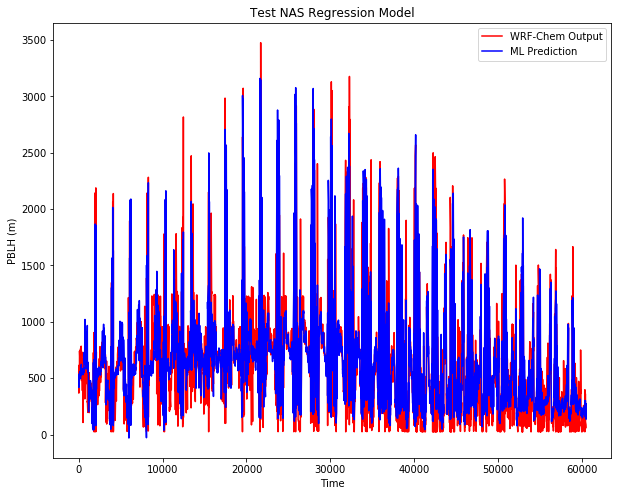

In [316]:
plt.figure(figsize=(10,8))
plt.title('Test NAS Regression Model')
plt.xlabel('Time')
plt.ylabel('PBLH (m)')
plt.plot(df_oneDay['expected_de'], 'r', label='WRF-Chem Output')
plt.plot(df_oneDay['predicted_de'], 'b', label='ML Prediction ')
plt.legend()
plt.show()

In [246]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 116)]             0         
_________________________________________________________________
categorical_encoding (Catego (None, 116)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               59904     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664 

In [249]:
from contextlib import redirect_stdout

with open('csv/modelsummary_50Trial_100Epochs_20190501_0503.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [266]:
import os
import pickle

In [267]:
def save_pickle_model_to_file(model, name_model):
    with open(os.path.join(str(name_model)+".pickle"), 'wb') as file:
        pickle.dump(model, file)
    print(str(Path(str(name_model)+".pickle"))+' - model saved!')

In [268]:
save_pickle_model_to_file(model, 'Model/ModelSummary')

TypeError: can't pickle _thread.RLock objects

In [260]:
from os import path

In [ ]:
def save_pickle_model_to_file(model, name_model):
    with open(Path(str(name_model)+".pickle"), 'wb') as file:
        pickle.dump(model, file)
    print(str(Path(str(name_model)+".pickle"))+' - model saved!')